In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
from IPython.display import Image
import numpy as np
import pylab as plt

import scipy.linalg
from scipy import special

from scipy.integrate import odeint
from scipy.signal import chirp, find_peaks, peak_widths

%matplotlib notebook
%matplotlib inline

-------
_Faculté des Sciences de Sorbonne Université & Arts et Métiers ParisTech: Master 2 SPI - Model and numerical simulation in aeroeslasticity_ (2021-2022)

## Title : Secondary birfurcation of PAPA systems with cubic stiffness

**Team** 
* student 1, valentin.duvivier@etu.sorbonne-universite.fr, Sorbonne Université
* student 2, abouakil.majda@etu.sorbonne-universite.fr, Sorbonne Université

**PURPOSE**: The purpose of the project is to create a notebook that numerically solves the limit cycle oscillations of the PAPA system in the presence of cubic restoring forces in pitch motion. In particular, we intend to study the secondary bifurcation of an aeroelastic airfoil motion as studied by Liu and Dowell in 2004 [5].

**Pre-requisite:** PAPA dynamic equation of motion, cours d'instabilité.



**Send questions to :**
_jean-camille.chassaing@sorbonne-universite.fr_

### Partie 1 - Etude d'une non linearité cubique

Dans ce projet, on dispose de 2 feuilles de calcul Python [3,4] dédiée à la simulation  de  la réponse temporelle d'un modèle PAPA en présence d'un modèle non-linéaire cubique de raideur en flexio  et torsion.
Le modèle aéroélastique codé correspond exactement au modèle publié par Price et _al._ [2,1] dont la théorie et le principe de résolution sont présentés dans le notebook [3].

**_Question 1: Analyse du modèle aéoélastique_**

* En basant votre analyse sur les éléments théoriques à votre disposition comparer le modèle aérodynamique qui sera considéré dans cette étude par rapport à ceux vu en cours. 
* Faites une rapide étude bibliographique pour **expliquer l'existence d'une bifurcation de Hopf** dans le cas d'un modèle aéroélastique non linéaire. Définir mathématiquement les **critères d'existence** d'une bifurcation de Hopf (on pourra illustrer le phénomène sur une equation modèle à 1 DLL, de type oscillateur de Duffing).

En analyse de stabilité linéaire, on suppose que les valeurs propres d'une solution (e.g. le déplacement angulaire) ont une partie réelle non-nulle. Si l'analyse linéaire ne suffit ou n'aboutit pas, alors on doit avoir recours à l'analyse non-linéaire pour déterminer la stabilitié du système dynamique.

On s'intéresse à la bifurcation de stabilité d'un système dynamique par rapport à un paramètre $\delta$. En faisant varier ce paramètre, on va pouvoir faire apparaître une bifurcation dans le comportement du système. Si, lorsque $\delta$ varie, les valeurs propres de la matrice jacobienne sont des complexes conjugués qui croisent l'axe des imaginaires, on a alors une **bifurcation de Hopf**.

" A Hopf-point can be regarded as the transition point where a stable equilibrium solution changes to an oscillatory solution" [8]

* **Distinguer les cas d'une bifurcation de Hopf** _sous-critique_ et _super-critique_ et  leur conséquence sur le comportement aéroélastique du système (condition d'apparition par rapport à la vitesse critique linéaire, amplitude des cycles limites, sensibilité aux conditions initiales,...)

Le cycle oscillant est stable si la quantité spécifique appelée premier exposant de Lyapunov est négative (c'est-à-dire que toute petite déviation appliqué à un point du cycle limite décroit exponentiellement au premier ordre), et la bifurcation de Hopf est alors dite super-critique. 

Dans le cas contraire (premier exposant de Lyapunov nul ou positif), le cycle limite est instable et la bifurcation est dite sous-critique. [9]

<img  src="Figures/600px-Hopfbifurcation.png"  width="450" />

Soit $\beta_{\alpha}$ le coefficient du ressort cubique en torsion. 

Lorsque $\beta_{\alpha}$  est négatif, il se produit une bifurcation de Hopf sous-critique en $\frac{U}{U*} = 1$. 
* Pour $\frac{U}{U*} < 1$ le système converge vers l'équilibre stable ;

* Pour $\frac{U}{U*} > 1$ le système diverge vers l'équilibre instable.

![](Figures/ref_1.png)

Si en revanche $\beta_{\alpha}$  est positif, le diagramme de bifurcation change (cf la figure qui suit). 

* Si $\frac{U}{U*} < 1$, la solution est stable en $\alpha=0$ tandis que cette position devient instable dès lors que $\frac{U}{U*} > 1$ ;

* si $\frac{U}{U*} > 1$ il existe d'autres branches à $\alpha \neq 0$° qui sont elles stables.

![](Figures/ref_2.png)

Nous verrons que les conditions initiales du système sont amenés à nous faire passer de l'un de ces cas à un autre.

#### Mathematically

In this study, we consider the typical section airfoil subjected to a two-degree-of-freedom motion with plunge displacement of the elastic axis $h$ and pitch angle $\alpha$  (about the elastic axis).

According to [1], "a thin wing or propeller blade which is being twisted will most likely behave as a cubic hardening spring which becomes stiffer as the angle of twist increases".

The coupled bending-torsion equations of motion can then be written in the non-dimensional form as follows [1]: 

\begin{eqnarray}
\xi^{,,} + x_{\alpha}\alpha^{,,} + 2\zeta_{\xi}\frac{\bar{\omega}}{U^{\ast}}\xi^{,} + \left(\frac{\bar{\omega}}{U^{\ast}}\right)^{2} k_{\xi}\xi &=& -\frac{1}{\pi\mu}C_{L}(\tau)  \\
\frac{x_{\alpha}}{r_{\alpha}^{2}}\xi^{,,}+\alpha^{,,} + 2\frac{\zeta_{\alpha}}{U^{\ast}}\alpha^{,} + \left(\frac{1}{U^{\ast}}\right)^{2} k(\alpha)  &=& \frac{2}{\pi\mu r_{\alpha}^{2}} C_{M}(\tau) \label{eq_motion} 
\end{eqnarray}

where $\xi=\dfrac{h}{b}$ denotes the nondimensional displacement of the elastic axis with half-chord $b$, $x_\theta$ is the static unbalance, $a_h$ denotes the non-dimensional distance between the mid-chord and the elastic axis, $r_{\alpha}$ is the radius of giration about the elastic axis, $\mu$ represents the mass ratio, the viscous damping coefficients in pitch and plunge are $\zeta_{\alpha}$ and $\zeta_{\xi}$ respectively, and $\bar{\omega}=\dfrac{\omega_h}{\omega_\alpha}$ is the frequency ratio computed from the uncoupled plunging $\omega_h$ and $\omega_\alpha$ frequencies of the undamped motion.

In addition, the non-dimensionalization has been made possible by imposing : the non-dimensional velocity $U^*=\dfrac{U}{b\omega_\alpha}$ and a differentiation with respect to the nondimensional time $\tau=\dfrac{Ut}{b}$.

The element that differ from the cases of the course are :
* consideration of viscous damping in the structure ;


* system here is under no external forces. Generalized rhs forces then account for the influence of incoming flow instead of imposed forces;


* the damping is non linear in pitch :
    * usually $k(\alpha)=k_{\alpha}.\alpha$ with $k_{\alpha} \in \mathbb{R}$
    * here $k(\alpha)=k_{\alpha_1}\alpha + k_{\alpha_3}\alpha^3 + k_{\alpha_5}\alpha^5$ with $k_{\alpha_i} \in \mathbb{R}$, $k_{\alpha_5}=0$

 ---

**_Question 2: Etude de la réponse temporelle_**

* Saisir dans la fonction  _Config_Lee_PAS_1999_Fig_33_single_speed_ du notebook [3] les paramètres aéromécaniques afin de retrouver les résultats de la Figure 33 de la référence [1].

* Tracer, pour la configuration étudiée, l'allure du coefficient de raideur en torsion en fonction de l'angle de torsion.

In this part, we get our first insight into the PAPA resolution code through an application to vertical position $\xi$. We then want to see if the resolution of above differential system provides reliable results.

In [4]:
def ode_coef_unsteady(cfg, tau):
    
    """ %----------------------------------------------------------------
        % PURPOSE:   Compute the time-dependent parameters f(t) and g(t)
        %----------------------------------------------------------------
    """
    
    # Compute the time-dependent parameters f(t) and g(t)
    
    f  = 2/cfg.mu*((0.5-cfg.a_h)*cfg.a0_deg*np.pi/180+cfg.h0)*(cfg.psi_1*cfg.eps_1*np.exp(-cfg.eps_1*tau) \
                                          +cfg.psi_2*cfg.eps_2*np.exp(-cfg.eps_2*tau))        
    
    g  =-(1+2*cfg.a_h)/(2.*cfg.r_a**2)*(2/cfg.mu*((0.5-cfg.a_h)*cfg.a0_deg*np.pi/180+cfg.h0)*\
        (cfg.psi_1*cfg.eps_1*np.exp(-cfg.eps_1*tau)+cfg.psi_2*cfg.eps_2*np.exp(-cfg.eps_2*tau))) 
    
    return f, g

In [5]:
def ode_coef_CD(cfg):
    
    """ %-----------------------------------------------------------------------------------------------------------
        % PURPOSE:   WRITE the aeroelastic system in the form of a 2nd order ODE.
        %            In the case of non-linearities of the stifness matrix, the system of governing equations reads:
        %
        %    c0*ddxi+c1*ddalpha+c2*dxi+c3*dalpha+c4*xi+c5*alpha+c6*w1+c7*w2+c8*w3+c9*w4+c10*G(xi   ) = f(tau)
        %    d0*ddxi+d1*ddalpha+d2*dxi+d3*dalpha+d4*xi+d5*alpha+d6*w1+d7*w2+d8*w3+d9*w4+d10*M(alpha) = g(tau)
        %
        %    f and g are functions of time 
        %-----------------------------------------------------------------------------------------------------------
    """
    
    C = np.zeros(11)
    D = np.zeros(11)   

    C[0]  =  1+1/cfg.mu
    C[1]  = cfg.x_a - cfg.a_h/cfg.mu
    C[2]  =  2*(1-cfg.psi_1-cfg.psi_2)/cfg.mu + 2*cfg.zeta_h*cfg.omgb/cfg.U_star
    C[3]  = (1+(1-2*cfg.a_h)*(1-cfg.psi_1-cfg.psi_2))/cfg.mu
    C[4]  =  2*(cfg.eps_1*cfg.psi_1+cfg.eps_2*cfg.psi_2)/cfg.mu
    C[5]  =  2*(1-cfg.psi_1-cfg.psi_2+(0.5-cfg.a_h)*(cfg.eps_1*cfg.psi_1+cfg.eps_2*cfg.psi_2))/cfg.mu
    C[6]  =  2*cfg.eps_1*cfg.psi_1*(1-cfg.eps_1*(0.5-cfg.a_h))/cfg.mu
    C[7]  =  2*cfg.eps_2*cfg.psi_2*(1-cfg.eps_2*(0.5-cfg.a_h))/cfg.mu
    C[8]  = -2*cfg.eps_1**2*cfg.psi_1/cfg.mu
    C[9]  = -2*cfg.eps_2**2*cfg.psi_2/cfg.mu
    C[10] = (cfg.omgb/cfg.U_star)**2
    
    D[0]  =   (cfg.x_a-cfg.a_h/cfg.mu)/cfg.r_a**2
    D[1]  =   1+(1+8*cfg.a_h**2)/(8.*cfg.mu*cfg.r_a**2)
    D[2]  =  -(1+2*cfg.a_h)*(1-cfg.psi_1-cfg.psi_2)/(cfg.mu*cfg.r_a**2)
    D[3]  =   ((1-2*cfg.a_h)-(1+2*cfg.a_h)*(1-2*cfg.a_h)*(1-cfg.psi_1-cfg.psi_2))\
            / (2*cfg.mu*cfg.r_a**2)+2*cfg.zeta_a/cfg.U_star
    D[4]  =  -(1+2*cfg.a_h)*(cfg.eps_1*cfg.psi_1+cfg.eps_2*cfg.psi_2)/(cfg.mu*cfg.r_a**2)
    D[5]  =  -(2*(1+2*cfg.a_h)*(1-cfg.psi_1-cfg.psi_2)+(1+2*cfg.a_h)*(1-2.*cfg.a_h)\
            * (cfg.psi_1*cfg.eps_1-cfg.psi_2*cfg.eps_2))/(2.*cfg.mu*cfg.r_a**2)
    D[6]  =  -(1+2*cfg.a_h)*cfg.psi_1*cfg.eps_1*(1-cfg.eps_1*(0.5-cfg.a_h))/(cfg.mu*cfg.r_a**2)
    D[7]  =  -(1+2*cfg.a_h)*cfg.psi_2*cfg.eps_2*(1-cfg.eps_2*(0.5-cfg.a_h))/(cfg.mu*cfg.r_a**2)
    D[8]  =   (1+2*cfg.a_h)*cfg.psi_1*cfg.eps_1**2/(cfg.mu*cfg.r_a**2)
    D[9]  =   (1+2*cfg.a_h)*cfg.psi_2*cfg.eps_2**2/(cfg.mu*cfg.r_a**2)
    D[10] =    1/cfg.U_star**2
    
    return C, D

In [6]:
def compute_RHS(q, tau, cfg, q0):
    
    """ Return the rhs f= [f0,...f7] of the fisrt-order EDO of the nonlinear PAPA system (Eq. 13)
    
        Comment : the ordering of the unknown vector x is:
        x[0:7] = [x1   , x2    , x3,  x4, x5, x6, x7, x8]^T  
               = [alpha, dalpha, xi, dxi, w1, w2, w3, w4]^T    
    """    
    
    # compute the coefficients of the 2nd order ODE
    [C, D] = ode_coef_CD(cfg)
    #D = ode_coef_D()

    # Compute the time-dependent parameters f(t) and g(t)
    [f, g] = ode_coef_unsteady(cfg, tau)

    # Compute the linear terms of the ODE (ok)
    P =  C[2]*q[3] + C[3]*q[1] + C[4]*q[2] + C[5]*q[0] + C[6]*q[4] + C[7]*q[5] + C[8]*q[6] + C[9]*q[7] - f
    H =  D[2]*q[3] + D[3]*q[1] + D[4]*q[2] + D[5]*q[0] + D[6]*q[4] + D[7]*q[5] + D[8]*q[6] + D[9]*q[7] - g
        
    # Polynomial nonlinearities
    K_h = cfg.kh_c1*q[2] + cfg.kh_c3*np.power(q[2],3) + cfg.kh_c5*np.power(q[2],5)
    K_a = cfg.ka_c1*q[0] + cfg.ka_c3*np.power(q[0],3) + cfg.ka_c5*np.power(q[0],5)
        
    # Assemble the rhs in dqdt=rhs for the unknown: 
    # q(0:7) = [alpha, dalpha, xi, dxi, w1, w2, w3, w4],   rq. [alpha]=rad; [dalpha]=rad/s
    rhs    = np.zeros(8)       # a column vector (with 8 lines)
    rhs[0] =  q[1]
    rhs[1] =( C[0]*(H+D[10]*K_a) - D[0]*(P+C[10]*K_h) )/ (D[0]*C[1]-D[1]*C[0])
    rhs[2] =  q[3]
    rhs[3] =(-C[1]*(H+D[10]*K_a) + D[1]*(P+C[10]*K_h) )/ (D[0]*C[1]-D[1]*C[0])
    rhs[4] =  q[0] - cfg.eps_1*q[4]
    rhs[6] =  q[2] - cfg.eps_1*q[6]
    rhs[5] =  q[0] - cfg.eps_2*q[5]
    rhs[7] =  q[2] - cfg.eps_2*q[7]
    
    return rhs

In [7]:
def solve_LCO_PAPA(cfg):
    
    """ Main program for the time-domain LCO solution of the nonlinear PAPA 
    system with polynomial restoring forces in pitch.
    """
    
    # the size of the time-step is prescribed by the user
    nbstp  = int(cfg.tau_max / cfg.time_step)

    # Allocate tables
    time   = np.linspace(0, cfg.tau_max, num=nbstp)
    pitch  = np.zeros(nbstp)
    dpitch = np.zeros(nbstp)
    plung  = np.zeros(nbstp)
    dplung = np.zeros(nbstp)

    # Initial Conditions:  = [alpha, dalpha, xi, dxi, w1, w2, w3, w4]^T
    q0  = np.array([cfg.a0_deg*np.pi/180., cfg.da0_deg*np.pi/180, cfg.h0, cfg.dh0, 0, 0, 0, 0,]); 

    # Time integration
    sol = odeint(compute_RHS, q0, time, args=(cfg, q0))

    # Get time histories of the unknowns of interest
    pitch [:] = sol[:,0]/np.pi*180.  # pitch displacement in deg.
    dpitch[:] = sol[:,1]/np.pi*180.
    plung [:] = sol[:,2]
    dplung[:] = sol[:,3]
    # 4 others sol[:,i] are zero as w_i=0
    
    #print('Normal end of execution',cfg.U_star)
    #print('Running airspeed index:',cfg.U_star)
    
    return [time, pitch, dpitch, plung, dplung, np.real(sol[-1,:]), np.imag(sol[-1,:])]

To this aim we choose following parameters :
\begin{equation}
\mu = 100, ~ \bar{\omega} = 0.2, ~a_h = -0.5, ~\zeta_{a,h} = 0, ~r_{\alpha} = 0.5, ~x_{\alpha} = 0.25, k_{\alpha_{1}} = 1, k_{\alpha_{3}} = 3, k_{\alpha_{5}} = 0
\end{equation}

The nondimensional flutter velocity of this configuration is $V_f = 8.23 (6.256302)$.
The initial conditions are defined by 

\begin{equation}
\alpha(0) = 3 {\rm deg.}, ~d\alpha(0)/d\tau = 0 {\rm deg./s}, ~\xi(0)=0, ~d\xi(0)/d\tau=0
\end{equation}

In [8]:
class Part1_Q2(object):
  
  # Operating condition:
  # Take the parameters used in Lee et al., PAS 35(1999) 205-334; figs 32-33 '  
    Vf      =   6.2851     # nondimensional linear flutter velocity (found by trial/error using the solver with k_c3=0)

    omgb    =   0.2        # frequency ratio of the uncoupled frequencies plunge/pitch
    r_a     =   0.5        # radius of gyration about the E.A.
    x_a     =   0.25       # distance from E.A to C.G   (adim)
    a_h     =  -0.5        # non-dim. distance from chi/2 to E.A
    mu      = 100.         # mass ratio: mu=m/(pi*rho*b^2*l), m is the airfoil mass per lenght l
    
    zeta_h  =   0.         # viscous damping in plunge
    zeta_a  =   0.         # viscous damping in pitch
    
  # Model of the non-linear restoring forces (assumed polynomial non-linearities)
    kh_c1   =   1.
    kh_c3   =   0.
    kh_c5   =   0.  
    
    ka_c1   =   1.
    ka_c3   =   3.
    ka_c5   =   0.

  # initial conditions   
    a0_deg  = 1  # intitial pitch angle
    da0_deg = 0  # intitial pitch rate
    
    h0      = 0  # intitial plunge displacement
    dh0     = 0  # intitial plunge rate
    
  # Aerodynamic operator: two-states incompressible model from Jones
    psi_1 = 0.165
    psi_2 = 0.335
    
    eps_1 = 0.0455
    eps_2 = 0.3  

  # set the total simulation time  
    tau_max   = 400. 
    time_step =    .051

In [9]:
# Load the nonlinear aeroelastic configuration of interest
cfg = Part1_Q2

cfg.U_star  = 0.8*cfg.Vf  # non-dimensional airspeed  (=U/b/omg_a)

In [10]:
# Run the solver 
[time, pitch, dpitch, plung, dplung, dmpg, freq] = solve_LCO_PAPA(cfg)

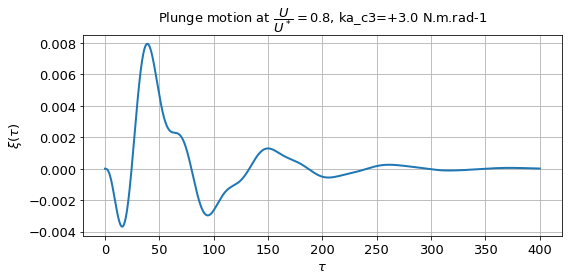

In [11]:
size = 13 # size title, axis, ticks, etc

# -----

plt.figure(figsize=(8,4))

plt.plot(time[:], plung[:], '-', lw=2)

plt.title(r'Plunge motion at $\dfrac{U}{U^*}=0.8$,'+' ka_c3={:+.1f} N.m.rad-1'.format(cfg.ka_c3), size=size)
plt.xlabel(r'$\tau$', size=size)
plt.ylabel(r'$\xi(\tau)$', size=size)

plt.xticks(size=size)
plt.yticks(size=size)

plt.grid(True)

plt.tight_layout()

It appears that below flutter speed (namely the incoming flow is below flutter speed), the system is correctly damped and airfoil remains stable.

Let's see how the stifness coefficient looks for ka_c3 = 3 N.m.rad-1 (namely cubic stiffness.)

In [12]:
def compute_RHS_Ka(q, tau, cfg, q0, nbstp):
    
    """ Return the rhs f= [f0,...f7] of the fisrt-order EDO of the nonlinear PAPA system (Eq. 13)
    
        Comment : the ordering of the unknown vector x is:
        x[0:7] = [x1   , x2    , x3,  x4, x5, x6, x7, x8]^T  
               = [alpha, dalpha, xi, dxi, w1, w2, w3, w4]^T    
    """    

    # compute the coefficients of the 2nd order ODE
    [C, D] = ode_coef_CD(cfg)
    #D = ode_coef_D()

    # Compute the time-dependent parameters f(t) and g(t)
    [f, g] = ode_coef_unsteady(cfg, tau)

    # Compute the linear terms of the ODE (ok)
    P =  C[2]*q[3] + C[3]*q[1] + C[4]*q[2] + C[5]*q[0] + C[6]*q[4] + C[7]*q[5] + C[8]*q[6] + C[9]*q[7] - f
    H =  D[2]*q[3] + D[3]*q[1] + D[4]*q[2] + D[5]*q[0] + D[6]*q[4] + D[7]*q[5] + D[8]*q[6] + D[9]*q[7] - g
    
    # Polynomial nonlinearities
    K_h = cfg.kh_c1*q[2] + cfg.kh_c3*np.power(q[2],3) + cfg.kh_c5*np.power(q[2],5)
    K_a = cfg.ka_c1*q[0] + cfg.ka_c3*np.power(q[0],3) + cfg.ka_c5*np.power(q[0],5)

    # --------
    
    plt.plot(q[0]*180/np.pi, K_a, '.', color='royalblue')
    
#     plt.legend(['test'])
    
    # --------
    
    # Assemble the rhs in dqdt=rhs for the unknown: 
    # q(0:7) = [alpha, dalpha, xi, dxi, w1, w2, w3, w4],   rq. [alpha]=rad; [dalpha]=rad/s
    rhs    = np.zeros(8)       # a column vector (with 8 lines)
    rhs[0] =  q[1]
    rhs[1] =( C[0]*(H+D[10]*K_a) - D[0]*(P+C[10]*K_h) )/ (D[0]*C[1]-D[1]*C[0])
    rhs[2] =  q[3]
    rhs[3] =(-C[1]*(H+D[10]*K_a) + D[1]*(P+C[10]*K_h) )/ (D[0]*C[1]-D[1]*C[0])
    rhs[4] =  q[0] - cfg.eps_1*q[4]
    rhs[6] =  q[2] - cfg.eps_1*q[6]
    rhs[5] =  q[0] - cfg.eps_2*q[5]
    rhs[7] =  q[2] - cfg.eps_2*q[7]
    
    return rhs

In [13]:
def solve_LCO_PAPA(cfg):
    
    """ Main program for the time-domain LCO solution of the nonlinear PAPA 
    system with polynomial restoring forces in pitch.
    """
    
    # the size of the time-step is prescribed by the user
    nbstp  = int(cfg.tau_max / cfg.time_step)

    # Allocate tables
    time   = np.linspace(0, cfg.tau_max, num=nbstp)
    pitch  = np.zeros(nbstp)
    dpitch = np.zeros(nbstp)
    plung  = np.zeros(nbstp)
    dplung = np.zeros(nbstp)

    # Initial Conditions:  = [alpha, dalpha, xi, dxi, w1, w2, w3, w4]^T
    q0  = np.array([cfg.a0_deg*np.pi/180., cfg.da0_deg*np.pi/180, cfg.h0, cfg.dh0, 0, 0, 0, 0,]); 

    # Time integration
    sol = odeint(compute_RHS_Ka, q0, time, args=(cfg, q0, nbstp))

    # Get time histories of the unknowns of interest
    pitch [:] = sol[:,0]/np.pi*180.  # pitch displacement in deg.
    dpitch[:] = sol[:,1]/np.pi*180.
    plung [:] = sol[:,2]
    dplung[:] = sol[:,3]
    # 4 others sol[:,i] are zero as w_i=0
    
    #print('Normal end of execution',cfg.U_star)
    #print('Running airspeed index:',cfg.U_star)
    
    return [time, pitch, dpitch, plung, dplung, np.real(sol[-1,:]), np.imag(sol[-1,:])]

In [14]:
# Load the nonlinear aeroelastic configuration of interest
cfg = Part1_Q2

cfg.U_star  = 0.8*cfg.Vf  # non-dimensional airspeed  (=U/b/omg_a)

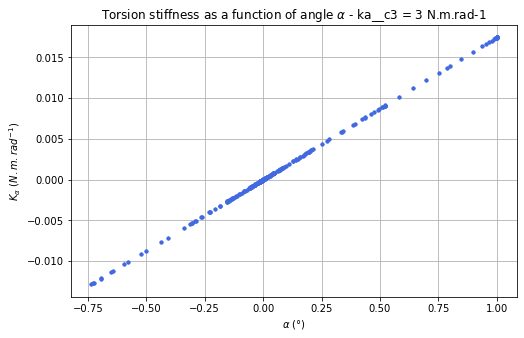

In [15]:
# Run the solver 

plt.figure(figsize=(8,5))

[time, pitch, dpitch, plung, dplung, dmpg, freq] = solve_LCO_PAPA(cfg)

plt.title(r'Torsion stiffness as a function of angle $\alpha$ - ka__c3 = 3 N.m.rad-1')
plt.xlabel(r'$\alpha$ (°)')
plt.ylabel(r'$K_{\alpha}$ ($N.m.rad^{-1}$)')

plt.grid(True)

It appears that as $\alpha\ll 1$ we have a linear relation $K-\alpha$.

However, we keep in mind that not only the presence of the non-linearity but also its amplitude will affect results. Therefore, it's gonna be necessary to check the influence of factors ka_c1 and ka_c3 on shape (currently resp. $1.$ and $3.$).

 --------------------------------------

**_Question 3: Etude du diagramme de bifurcation_**

We have seen how behaves the airfoil to its flying condition in the damped non-resonating case. Let's see when these resonnances occur and how does the airfoil react then.

To do so, we will map the airfoils behavior in function of the ratio $U^*/V_f$ telling one the incoming speed wrt to flutter speed $V_f$ ; through a **bifurcation diagram**. We especially want to check results from figure 3, page 181 of reference [2]

First and foremost, let's recover the value of flutter speed $V_f$ from a study of solution's real part's sign:

##### Flutter speed Vf

In [16]:
def solve_LCO_PAPA(cfg):
    
    """ Main program for the time-domain LCO solution of the nonlinear PAPA 
    system with polynomial restoring forces in pitch.
    """
    
    # the size of the time-step is prescribed by the user
    nbstp  = int(cfg.tau_max / cfg.time_step)

    # Allocate tables
    time   = np.linspace(0, cfg.tau_max, num=nbstp)
    pitch  = np.zeros(nbstp)
    dpitch = np.zeros(nbstp)
    plung  = np.zeros(nbstp)
    dplung = np.zeros(nbstp)

    # Initial Conditions:  = [alpha, dalpha, xi, dxi, w1, w2, w3, w4]^T
    q0  = np.array([cfg.a0_deg*np.pi/180., cfg.da0_deg*np.pi/180, cfg.h0, cfg.dh0, 0, 0, 0, 0,]); 

    # Time integration
    sol = odeint(compute_RHS, q0, time, args=(cfg, q0))

    # Get time histories of the unknowns of interest
    pitch [:] = sol[:,0]/np.pi*180.  # pitch displacement in deg.
    dpitch[:] = sol[:,1]/np.pi*180.
    plung [:] = sol[:,2]
    dplung[:] = sol[:,3]
    # 4 others sol[:,i] are zero as w_i=0
    
    #print('Normal end of execution', cfg.U_star)
    #print('Running airspeed index:', cfg.U_star)
    
    return [time, pitch, dpitch, plung, dplung, np.real(sol[-1,:]), np.imag(sol[-1,:])]

In [17]:
V_max = 7
V_min = 5

eps   = 1E-2
nbrun = 200
speed_index = np.linspace(V_min, V_max, num=nbrun)

dmpg  = np.zeros((8, nbrun), dtype=float) # 4 as we have 4 eigen-values --> we then will consider max (abs value) to define lambda_flutter
freq  = np.zeros((8, nbrun), dtype=float) # same

# ------

for idx, val in enumerate(speed_index):
    
    cfg.ka_c3   = 0.

    cfg.Vf      = val
    cfg.U_star  = 1.0*cfg.Vf
    
    # Solve the flutter determinant
    [time, pitch, dpitch, plung, dplung, damping, frequency] = solve_LCO_PAPA(cfg)    
    
    dmpg[:,idx] = damping[:]
    freq[:,idx] = frequency[:]

# ------------------------------------------ #

abs_dmpg = np.abs(dmpg)
idx      = np.where(abs_dmpg > eps)

print('\nV_f = {:.6f} m.s-1'.format(speed_index[idx[1][0]]))

cfg.Vf   = speed_index[idx[1][0]]


V_f = 6.266332 m.s-1


---

Then, the configuration of interest from ref [2] is given by :

\begin{equation}
\mu = 100, ~ \bar{\omega} = 0.2, ~a_h = -0.5, ~\zeta_{a,h} = 0, ~r_{\alpha} = 0.5, ~x_{\alpha} = 0.25, k_{\alpha_{1}} = 1, k_{\alpha_{3}} = 40, k_{\alpha_{5}} = 0
\end{equation}

The nondimensional flutter velocity of this configuration is $V_f = 6.266332$ $m.s^{-1}$.
The initial conditions are defined by 

\begin{equation}
\alpha(0) = 1 {\rm deg.}, ~d\alpha(0)/d\tau = 0 {\rm deg./s}, ~\xi(0)=0, ~d\xi(0)/d\tau=0
\end{equation}

Function that englobes the different functions we will now use

In [18]:
from module_PAPA_LCO_ODEint import * #import all functions at once for simplification's sake

In [19]:
class Part1_Q3(object):
  
  # Operating condition:
  # Take the parameters used in [2]: Price, JFS, 1995 (Fig_3)
    Vf      =   6.266332   # nondimensional linear flutter velocity
    Sratio  =   0.8        # airspeed ratio (=U_star/Vf)
    U_star  = Sratio*Vf    # non-dimensional airspeed  (=U/b/omg_a)
    omgb    =   0.2        # frequency ratio of the uncoupled frequencies plunge/pitch
    r_a     =   0.5        # radius of gyration about the E.A.
    x_a     =   0.25       # distance from E.A to C.G   (adim)
    a_h     =  -0.5        # non-dim. distance from chi/2 to E.A
    mu      = 100.         # mass ratio: mu=m/(pi*rho*b^2*l), m is the airfoil mass per lenght l
    
    zeta_h  =   0.         # viscous damping in plunge
    zeta_a  =   0.         # viscous damping in pitch
    
  # Model of the non-linear restoring forces (assumed polynomial non-linearities)
    kh_c1   = 1.
    kh_c3   = 0.
    kh_c5   = 0.  
    
    ka_c1   =  0.1
    ka_c3   = 40.
    ka_c5   =  0.

  # initial conditions   
    a0_deg  = 1  # intitial pitch angle
    da0_deg = 0  # intitial pitch rate
    
    h0      = 0  # intitial plunge displacement
    dh0     = 0  # intitial plunge rate
    
  # Aerodynamic operator: two-states incompressible model from Jones
    psi_1 = 0.165
    psi_2 = 0.335
    
    eps_1 = 0.0455
    eps_2 = 0.3  

  # set the total simulation time  
    tau_max   = 2000. 
    time_step =     .051

Load the nonlinear aeroelastic configuration of interest

In [20]:
cfg = Part1_Q3

Compute the bifurcation map. More precisely, store for each speed index over a given range of interest, the peak in the amplitude of pitching during the LCO.

In [21]:
U_min = 0.1; U_max = 1.; nbrun = 100; nb_peaks = 10

[plot_speed, pitch_lco, cpt] = Compute_Bifurcation_Map(U_min, U_max, nbrun, cfg, nb_peaks)

task done.


Plot the bifurcation map

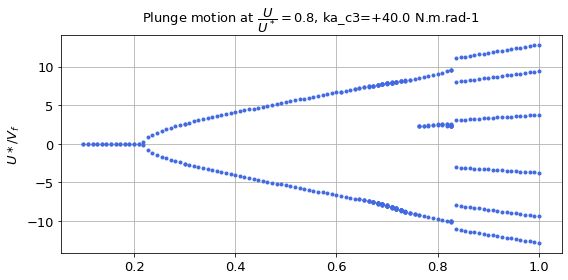

In [22]:
size = 13 # size title, axis, ticks, etc

# -----

plt.figure(figsize=(8,4))

plt.plot(plot_speed[0:cpt] / cfg.Vf, pitch_lco[0:cpt], '.', color='royalblue')  

plt.title(r'Plunge motion at $\dfrac{U}{U^*}=0.8$,'+' ka_c3={:+.1f} N.m.rad-1'.format(cfg.ka_c3), size=size)
plt.ylabel('alpha_LCO (deg.)', size=size)
plt.ylabel('$U*/V_f$', size=size)

plt.xticks(size=size)
plt.yticks(size=size)

plt.grid(True)

plt.tight_layout()

To compare with Figure 3 of [2], it's important to check the following points :

* the overall shape that is respected here. For instance, the number and shape of 2nd bifurcations are quiet the same ;


* some characteristic points of the figure. For instance, the points of 1st and 2nd bifurcation are here again the expected ones.

**$\underline{Objective}$ : The point now will be to understand what influences the bifurcation diagram and to understand the dependency between parameters and final bifurcation diagram.**

Before we do so, we here see how torsion stiffness looks as a function of $\alpha$.
This time, as one considers much bigger angles, the non-linearity appears clearly. Moreover, as we consider a higher 3rd order coefficient ka__c3 (40 vs 3), the non-linearity is furthermore highlighted.

<img  src="Figures/Part 1/Torsion_stiff_P1_Q3.png"  width="500" />

### Partie 2 - Etude du modèle non linéaire de Dowell [5]  

**_Question 1: Validation_**

We once again want to check the well-doing of the code by comparing our simulation to Figure 3 of ref [5], which is a cubic case with $\beta_{\alpha}=80.$

As a side note, we confirm that we verify both equations (5) and (6) of the same reference, namely here:

* $M(\alpha) = \alpha + 80\times \alpha^3$


* $G(\xi) = \xi + 0\times \xi^3 = \xi$

The configuration of interest for this question is:

\begin{equation}
\mu = 100, ~ \bar{\omega} = 0.2, ~a_h = -0.5, ~\zeta_{a,h} = 0, ~r_{\alpha} = 0.5, ~x_{\alpha} = 0.25, k_{\alpha_{1}} = 1, k_{\alpha_{3}} = 80, ~k_{\alpha_{5}} = 0
\end{equation}

The nondimensional flutter velocity of this configuration is $V_f = 8.23 (6.256302)$.
The initial conditions are defined by 

\begin{equation}
\alpha(0) = 1 {\rm deg.}, ~d\alpha(0)/d\tau = 0 {\rm deg./s}, ~\xi(0)=0, ~d\xi(0)/d\tau=0
\end{equation}

In [23]:
class Part2_Q1(object):
  
  # Operating condition:
  # Take the parameters used in [2]: Price, JFS, 1995 (Fig_3)
    Vf      =   6.266332     # nondimensional linear flutter velocity
    Sratio  =   1.0        # airspeed ratio (=U_star/Vf)
    U_star  = Sratio*Vf    # non-dimensional airspeed  (=U/b/omg_a)
    omgb    =   0.2        # frequency ratio of the uncoupled frequencies plunge/pitch
    r_a     =   0.5        # radius of gyration about the E.A.
    x_a     =   0.25       # distance from E.A to C.G   (adim)
    a_h     =  -0.5        # non-dim. distance from chi/2 to E.A
    mu      = 100.         # mass ratio: mu=m/(pi*rho*b^2*l), m is the airfoil mass per lenght l
    
    zeta_h  =   0.         # viscous damping in plunge
    zeta_a  =   0.         # viscous damping in pitch
    
  # Model of the non-linear restoring forces (assumed polynomial non-linearities)
    kh_c1   =   1.
    kh_c3   =   0. #gamma=0
    kh_c5   =   0.
    
    ka_c1   =   1.
    ka_c3   =  80.
    ka_c5   =   0.

  # initial conditions
    a0_deg  = 1  # intitial pitch angle
    da0_deg = 0  # intitial pitch rate
    
    h0      = 0  # intitial plunge displacement
    dh0     = 0  # intitial plunge rate
    
  # Aerodynamic operator: two-states incompressible model from Jones
    psi_1 = 0.165
    psi_2 = 0.335
    
    eps_1 = 0.0455
    eps_2 = 0.3

  # set the total simulation time
    tau_max   = 2000. 
    time_step =    0.051

In [24]:
cfg = Part2_Q1

<img  src="Figures/Part 2/Bifurcation_diag_P2_Q1.png"  width="600" />

This graph once again confirms the code we are building so far works well with both theory (i.e. flutter theory) and litterature (i.e. ref. [5]). It then appears that for the given set of initial conditions we chose, together with the non-linear value ka_c3 = 80 N.m.rad-1, the 1st and 2nd bifurcations respectively take place in $\dfrac{U^*}{V_f}\approx 1.$ and $\dfrac{U^*}{V_f}\approx 2.$

What we would like to do now is to have some indsight to the behavior of airfoil in some of these areas, that is 1st bifurcation zone, 2nd bifurcation zone, etc.

 ---

**_Question 2: Etude de la dynamique_**

We will study the aeroelastic response of the system to previous question in the 3 speed cases $U/U^*_L= 0.7, 1.5, 2.5$. For each of these, we will plot:

* the pitch angle signal as a function of time ;
* the phase bifuraction diagram : $\dot \alpha(t)b/V = \alpha(t)$
* the FFT of $\alpha(t)$

##### a. b. Pitch angle - Phase bifurcation diagram

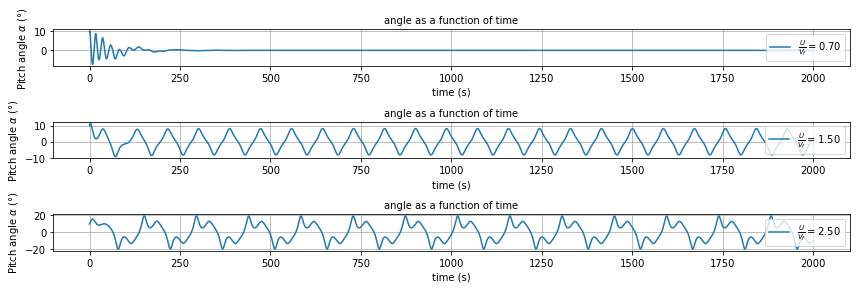

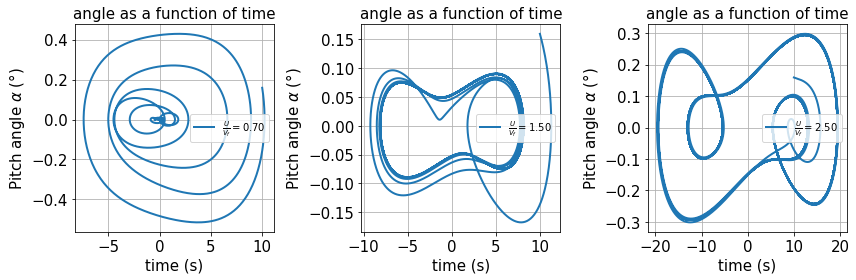

In [40]:
# U_UL_star = [0.7, 1.5, 2.5]

U_min = 0.1; U_max = 3.; nbrun = 100; nb_peaks = 10

speed_index = [0.7, 1.5, 2.5]

# ------

for idx, val in enumerate(speed_index):
    
    cfg.U_star  = val * cfg.Vf
    
    # ------
        
    # Solve the flutter determinant
    [time, pitch, dpitch, plung, dplung] = solve_LCO_PAPA(cfg)    
    
    # ------

    plt.figure(1, figsize=(12,4))

    plt.subplot(3, 1, idx+1)
    
    plt.plot(time, pitch, '-', label=r'$\frac{U}{V_f}=$'+'{:.2f}'.format(val))
    
    plt.title('angle as a function of time', size=10)
    plt.ylabel(r'Pitch angle $\alpha$ (°)', size=10)
    plt.xlabel('time (s)', size=10)

    plt.xticks(size=10)
    plt.yticks(size=10)

    plt.grid(True)
    plt.legend(prop={'size':10}, loc=7)
    
    plt.tight_layout()
    
    # ---------------

    plt.figure(2, figsize=(12,4))

    plt.subplot(1, 3, idx+1)
    
    plt.plot(pitch, dpitch*1/cfg.Vf, '-', lw=2, label=r'$\frac{U}{V_f}=$'+'{:.2f}'.format(val))
    
    plt.title('angle as a function of time', size=15)
    plt.ylabel(r'Pitch angle $\alpha$ (°)', size=15)
    plt.xlabel('time (s)', size=15)

    plt.xticks(size=15)
    plt.yticks(size=15)
    
    plt.grid(True)
    plt.legend(prop={'size':10}, loc=7)
    
    plt.tight_layout()

On these graphs, we first and foremost see that even when one considers $U^* > V_f$ the system remains stable. That is due to the non-linear restoring force that damps the system more and so airfoil remains stable.

<img  src="Figures/Part 2/association_pics_2.png"  width="600" />

However, as one increases the speed $U^*$, the response in angle changes slightly. For instance, as one gets passed $U^* / V_f=2.0$ we have a non-harmonical signal, still periodic though. This in fact corresponds to the 2nd bifurcation case here.

In detail, the different pics we observe for pitch angle as a function of time corresponds to the one in bifurcation diagram :

<img  src="Figures/Part 2/association_pics.png"  width="600" />

The number of pics one has depending on speed ratio can be obtained through a FFT of pitch signal.

##### c. FFT

<ipython-input-52-7d1c8a3fa850>:14: RuntimeWarning: divide by zero encountered in true_divide
  w = (2*np.pi / time)[::-1]
<ipython-input-52-7d1c8a3fa850>:14: RuntimeWarning: divide by zero encountered in true_divide
  w = (2*np.pi / time)[::-1]
<ipython-input-52-7d1c8a3fa850>:14: RuntimeWarning: divide by zero encountered in true_divide
  w = (2*np.pi / time)[::-1]


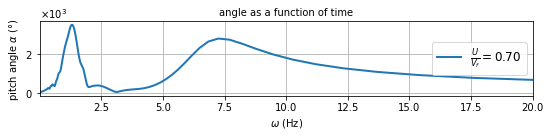

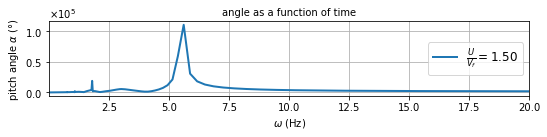

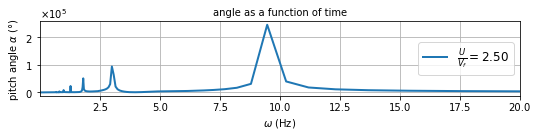

In [52]:
import scipy.fftpack

for idx, val in enumerate(speed_index):
    
    cfg.U_star  = val * cfg.Vf
    
    # ------
        
    # Solve the flutter determinant
    [time, pitch, dpitch, plung, dplung] = solve_LCO_PAPA(cfg)    
    
    # ------
    
    w = (2*np.pi / time)[::-1]
    fft_pitch = scipy.fftpack.fft(pitch)

    # -----

    fig, ax = plt.subplots(figsize=(8, 2))

    ax.plot(w[1000:], np.abs(fft_pitch[1000:]), '-', lw=2, label=r'$\frac{U}{V_f}=$'+'{:.2f}'.format(val))

    ax.set_title('angle as a function of time', size=10)
    ax.set_ylabel(r'pitch angle $\alpha$ (°)', size=10)
    ax.set_xlabel(r'$\omega$ (Hz)', size=10)

    plt.xticks(size=10)
    plt.yticks(size=10)

    ax.set_xlim(w[0], 20)

    plt.grid(True)
    plt.legend(prop={'size':12}, loc=7)

    plt.tight_layout()
    
    # ---- x10^ scale
    
    from matplotlib import ticker
    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True) 
    formatter.set_powerlimits((-1,1)) 
    ax.yaxis.set_major_formatter(formatter) 

From the FFT we confirm that :
* the signal for $\dfrac{U^*}{V_f}=1.5$ is close to harmonical as we observe only 1 pic. It should be purely harmonical for $\dfrac{U^*}{V_f}=1.0$ ;
* the signal for $\dfrac{U^*}{V_f}=2.5$ is indeed a complex signal made of several harmonics, in accordance to the different pics we observe.

Finally, for what is up to the case $\dfrac{U^*}{V_f}=0.5$, even though it should correspond to a harmonical case it isn't. It indeed looks like it's made of :
* a signal corresponding to the frequency of apparition of the pics, that one could associate to the damping behavior ;


* another one that corresponds to oscillation while damping, that are probably due to the non-linear term in damping force.

 ---

**_Question 3: Bassin d'attraction  2D_**

In this section, we will handle the study of system's parameters on system's response. To do so, one will want to **map result in angle** as a function of a set of initial conditions.

The configuration of interest is same as in Part1 Q1, namely:

\begin{equation}
\mu = 100, ~ \bar{\omega} = 0.2, ~a_h = -0.5, ~\zeta_{a,h} = 0, ~r_{\alpha} = 0.5, ~x_{\alpha} = 0.25, k_{\alpha_{1}} = 1., k_{\alpha_{3}} = 80, k_{\alpha_{5}} = 0
\end{equation}

The nondimensional flutter velocity of this configuration is $V_f = 6.266332$ $m.s^{-1}$.
The initial conditions are defined by 

\begin{equation}
\alpha(0) = variable, ~d\alpha(0)/d\tau = variable, ~\xi(0)=variable, ~d\xi(0)/d\tau=variable
\end{equation}

The point will be to recover Figure (6) of Liu and Dowell [5]. We will do that in 2 steps :

* consider $\xi(0)=0$ and $\dot \xi(0)=0$, while proceeding to the calculation of **surface response** $max(\alpha_{LCO}) = f(\alpha(0), \dot \alpha(0))$ for the 3 following non-dimensionnal speed :  $U^*/U^*_L = 1.975, 1.98, 2.03$. One will map for $\alpha_0 \in [-10, 10]$° and $\dot \alpha \in [-1, 1]$°/s.


* consider $\alpha(0)=0$ and $\dot \alpha(0)=0$, while proceeding to the calculation of **surface response** $max(\alpha_{LCO}) = f(\xi(0), \dot \xi(0))$ for the 3 following non-dimensionnal speed :  $U^*/U^*_L = 2, 2.1, 2.2$. One will map for $\xi(0) \in [-0.5, 0.5]$  et $\dot \xi(0) \in [-0.05, 0.05]$.

##### a. $\alpha$

In [27]:
class Part2_Q3(object):
  
  # Operating condition:
  # Take the parameters used in [2]: Price, JFS, 1995 (Fig_3)
    Vf      =   6.266332  # nondimensional linear flutter velocity
    Sratio  =   1.0        # airspeed ratio (=U_star/Vf)
    U_star  = Sratio*Vf    # non-dimensional airspeed  (=U/b/omg_a)
    omgb    =   0.2        # frequency ratio of the uncoupled frequencies plunge/pitch
    r_a     =   0.5        # radius of gyration about the E.A.
    x_a     =   0.25       # distance from E.A to C.G   (adim)
    a_h     =  -0.5        # non-dim. distance from chi/2 to E.A
    mu      = 100.         # mass ratio: mu=m/(pi*rho*b^2*l), m is the airfoil mass per lenght l
    
    zeta_h  =   0.         # viscous damping in plunge
    zeta_a  =   0.         # viscous damping in pitch
    
  # Model of the non-linear restoring forces (assumed polynomial non-linearities)
    kh_c1   =   1.
    kh_c3   =   0.  #gamma=0
    kh_c5   =   0.
    
    ka_c1   =   1.  # 1.???????
    ka_c3   =  80.  #80.???????
    ka_c5   =   0.

  # initial conditions
    a0_deg  = 0  # intitial pitch angle
    da0_deg = 0  # intitial pitch rate
    
    h0      = 0  # intitial plunge displacement
    dh0     = 0  # intitial plunge rate
    
  # Aerodynamic operator: two-states incompressible model from Jones
    psi_1 = 0.165
    psi_2 = 0.335
    
    eps_1 = 0.0455
    eps_2 = 0.3  

  # set the total simulation time  
    tau_max   = 2000. 
    time_step =     .051

In [28]:
cfg = Part2_Q3

In [29]:
eps   = 1E-2
speed_index = [1.975, 1.98, 2.03]

alpha_0   = np.linspace(-10., +10., 20)
d_alpha_0 = np.linspace(- 1., + 1., 20 +1)

# ------

STOCK_bassin_2D_alpha = np.zeros((len(speed_index), len(alpha_0), len(d_alpha_0)))

cfg.a0_deg  = 0
cfg.da0_deg = 0

cfg.h0  = 0
cfg.dh0 = 0

for i, ratio in enumerate(speed_index):
    cfg.Vf     = 6.286432
    cfg.U_star = ratio*cfg.Vf
        
    for j, a0 in enumerate(alpha_0):
        cfg.a0_deg = a0
        
        for k, da0 in enumerate(d_alpha_0):
            cfg.da0_deg = da0
    
            # Solve the flutter determinant
            [time, pitch, dpitch, plung, dplung] = solve_LCO_PAPA(cfg)    
        
            STOCK_bassin_2D_alpha[i,j,k] = np.max(pitch[int(len(pitch)/2):])

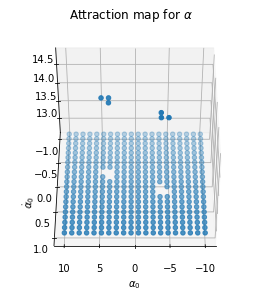

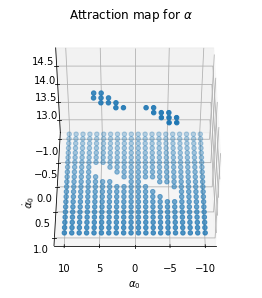

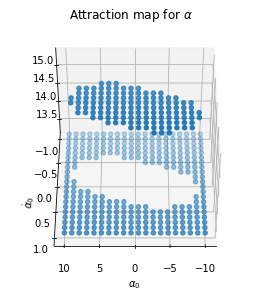

In [30]:
X, Y = np.meshgrid(alpha_0, d_alpha_0)

for i in range(len(speed_index)):

    fig = plt.figure(i, figsize=(10,4))
    ax  = fig.add_subplot(1, 1, 1, projection='3d')
    
    ax.scatter(X, Y, STOCK_bassin_2D_alpha[i,:,:].T)
    ax.view_init(45, 90)
    
    ax.set_title(r'Attraction map for $\alpha$')
    ax.set_xlabel(r'$\alpha_0$')
    ax.set_ylabel(r'$\dot \alpha_0$')
    
    plt.tight_layout()
    
    text = str(i)
#     plt.savefig('Figures/Part2/alpha/ratio_'+text+'.png')

$\Rightarrow$ **As a conclusion on these graphs it appears clearly comparing to ref figure that we get expected figures. Besides, we note that these results imply that the bigger $U^*$ the more the system is subject to resonnance.**

**Eventually, for a big enough incoming flow speed, the system will get unstable even though one considered cubic damping. The point is that other then flutter resonance there is divergece that may occur to the system if $U^*$ gets too high.**

**Note : the value of $V_f$ in above code differs slightly from the one obtained before ($\pm 0.02$) and either tells the graphs on the paper did a similar change in their values or that we have here a numerical error on our side.**

---

##### b. $\xi$

In [31]:
eps   = 1E-2
speed_index = [2.0, 2.1, 2.2]

xi_0   = np.linspace(-.50, +.50, 20)
d_xi_0 = np.linspace(-.05, +.05, 20 +1)

# ------

STOCK_bassin_2D_xi = np.zeros((len(speed_index), len(xi_0), len(d_xi_0)))

cfg.h0  = 0
cfg.dh0 = 0

for i, ratio in enumerate(speed_index):
    cfg.Vf     = 6.286432
    cfg.U_star = ratio*cfg.Vf
    
    for j, xi_loop in enumerate(xi_0):
        cfg.h0 = xi_loop
        
        for k, d_xi_loop in enumerate(d_xi_0):
            cfg.dh0 = d_xi_loop
    
            # Solve the flutter determinant
            [time, pitch, dpitch, plung, dplung] = solve_LCO_PAPA(cfg)    
        
#             print(np.max(pitch))
            STOCK_bassin_2D_xi[i,j,k] = np.max(pitch[int(len(pitch)/2):])

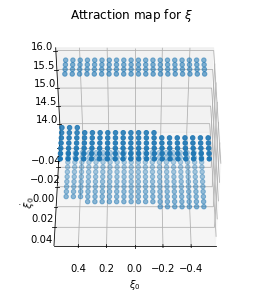

In [32]:
X, Y = np.meshgrid(xi_0, d_xi_0)

for i in range(len(speed_index)):

    fig = plt.figure(figsize=(10,4))
    ax  = fig.add_subplot(1, 1, 1, projection='3d')
    
    ax.scatter(X, Y, STOCK_bassin_2D_xi[i,:,:].T)
    ax.view_init(45, 90)
    
    ax.set_title(r'Attraction map for $\xi$')
    ax.set_xlabel(r'$\xi_0$')
    ax.set_ylabel(r'$\dot \xi_0$')
    
    plt.tight_layout()
    
    text = str(i)
    
#     plt.savefig('Figures/Part 2/xi/ratio_'+text+'.png')

$\Rightarrow$ **For this graph we have no element of comparison but we rather extend the study to the case of plung position. In this case, one can see the initial vertical position and speed change the value taken by $\xi$, close to 2nd bifurcation point.**

---

**_Question 4: Etude de non-linéarités de type "soft or hard springs" ...._**

We consider following configuration : $x_\alpha=0.1$, $\beta=0$, $\xi(0)= \dot \xi(0)=\dot \alpha(0)=0$ and $\alpha(0)=1$°, and we'dd like to plot the bifurcation diagrams in pitch and plung for $U^*/U^*_L \in [0.5,3]$ in the cases :
 * CASE A: **"Hard spring"** configuration (super-critical Hopf bifurcation) : $\gamma=30$ and $\bar\omega=0.8$.

 * CASE B: **"Soft spring"** configuration (sub-critical Hopf bifurcation) : $\gamma=10$ and $\bar\omega=1.2$.
 
We will then discuss the results obtained and conclude on the perspectives for one to furthermore study this non-linear problem.

Let's discuss the non-linearity of restoring force in plunge and discuss its influences on pitch and plunge angles.

## Supercritical and subcritical cases (see page 6 out of 19 of ref [5])

##### Super-critical

<img  src="Figures/Part 2/Pitch_1.png"  width="500" />

<img  src="Figures/Part 2/Plunge_1.png"  width="500" />

In this case the bifurcation is diverging, namely we have a jump from a stable position to another one.

This jump may be due to the set of initial parameters but it mainly tells on how dangerous a low speed test can be, as opposed to what one may have first thought.

For what is up to the influence of parameter $\Gamma$, one can see that to decrease it makes the structures more unstable. Therefore, we can conclude on the fact that considering non-linear damping force helps preventing instability.

What one should take a look at is wether this behavior is logical, namely it's a physical behavior, or if it's just a numerical result that isn't very consistent with practical case.

##### Sub-critical

<img  src="Figures/Part 2/Pitch_2.png"  width="500" />

<img  src="Figures/Part 2/Plunge_2.png"  width="500" />

The bifurcation here is much smoother such that transition is stable. This case should be less critical than above one given the airfoil suffers foreseeable movement while in the super-critical case the change in angle is very sudden.

Here as well the case where $\Gamma$ is the lowest corresponds to a more unstable case. This confirms once more the influence of non-linearity in both complexity of numerical resolution and more importantly on the system's stability.

### Conclusions et perspectives

As a conclusion, during this report we have seen different behaviors that could occure in an airfoil, in a non-linear pitch restoring force case.

We then derived behavior in both pitch and plunge motions while checking bifurcation theory.

As main results, we verified the conditions of apparition of bifurcation depending on intial conditions as well as incoming flow speed before generalizing the results through a 2D attraction map.

Further results can be derived by one, for instance by taking some indsight to the behavior as a function of non-linear plunge restoring force.

As a personal conclusion, we have been able to learn a lot on the physics of PAPA airfoil in the limit study of bifurcation cases, complementing the notion of the course through a numerical practical application.

**References:** 

[1] B.H.K. Lee􏱚􏱯, S.J. Price􏱛, Y.S. Wong􏱜, _Nonlinear aeroelastic analysis of airfoils: bifurcation and chaos_ , Progress in Aerospace Sciences 35 (1999) 205—334

[2] S.J. Price􏱛, H. Alighanbari, B.H.K. Lee, _The aeroelastic response of a two-dimensional airfoil with bilinear and cubic structural nonlinearities_, Journal of Fluids and Structures (1995), 9, 175-193.

[3] Notebook _PAPA_LCO_cubic.ipynb_, Aeroelasticity Classnotes 2021, Chassaing J-C, 2021

[4] Notebook _PAPA_LCO_cubic_diagram.ipynb_, Aeroelasticity Classnotes 2021, Chassaing J-C, 2021

[5] L. Liu and E.H. Dowell, _The Secondary Bifurcation of an Aeroelastic Airfoil Motion: Effect of High Harmonics_, Nonlinear Dynamics 37: 31–49, 2004.

[6] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
    
[7] https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

[8] B.H.K. Lee, S.J. Price, Y.S. Wong,
Nonlinear aeroelastic analysis of airfoils: bifurcation and chaos, 1999, Progress in Aerospace Sciences

[9] V. Hannes
Wikipedia https://fr.wikipedia.org/wiki/Bifurcation_de_Hopf#/media/Fichier:Hopfbifurcation.png
Adapted from V. Hannes _Formulation of Voltage Dynamics in Complex Quantities, bachelor thesis_,
January 2020

**THE END**